In [1]:
from lib.abstract_torch import get_device, get_loss, get_optimizer
from lib.dataloader import get_MNIST_loaders, get_FMNIST_loaders, get_CIFAR100_loaders, get_CIFAR10_loaders
from lib.model import ANN
from lib.train import train
from lib.test import test
from lib.growth_schedules import get_handcrafted_schedule
from lib.visualize import (visualize_pathes,
                          visualize_statistical_reliability,
                          visualize_box_plot)               

import os
import numpy as np

In [2]:
device = get_device()

In [3]:
path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "\\data"

# MNIST

## Get data loaders

In [4]:
batch_size=128

In [5]:
train_loader, val_loader, test_loader = get_MNIST_loaders(data_path, range(10), batch_size)

## Random Initialization

### Define, train and test both root & target models

In [6]:
# Network's initial architecture
num_inputs = 28*28
num_hidden = 10
num_outputs = 10

# Network's final architecture
num_hidden_target = 100

# Loss & optimizer
loss_name = "MSE" # "CE"
optimizer_name = "Adam"

# Hyperparameters
num_epochs = 3
lr = 5e-3
growth_schedule = None

# Experiment parameters
num_repetitions = 2

#### Root model

In [7]:
test_acc_roots = []
for i in range(num_repetitions) :
    root_model = ANN(num_inputs, num_hidden, num_outputs).to(device)
    _ = train(root_model, num_outputs, growth_schedule, loss_name, optimizer_name, lr, train_loader, val_loader, num_epochs, batch_size, device, verbose=0)
    test_acc_root = test(root_model, test_loader, batch_size, device)
    test_acc_roots.append(test_acc_root)

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:11<00:00,  3.83s/it]


In [8]:
test_acc_roots

[38.81217948717949, 30.138589743589748]

#### Target model

In [9]:
test_acc_targets = []
for i in range(num_repetitions) :
    target_model = ANN(num_inputs, num_hidden_target, num_outputs).to(device)
    _ = train(target_model, num_outputs, growth_schedule, loss_name, optimizer_name, lr, train_loader, val_loader, num_epochs, batch_size, device, verbose=0)
    test_acc_target = test(target_model, test_loader, batch_size, device)
    test_acc_targets.append(test_acc_target)

100%|██████████| 3/3 [00:11<00:00,  3.85s/it]


In [10]:
test_acc_targets

[92.77846153846154, 93.46935897435901]

### Grow root model

In [11]:
# Growth parameters
init_name = "random"
num_neurons = 9

In [12]:
growth_schedules = get_handcrafted_schedule(num_neurons)[:2]

In [13]:
test_accs_repeted = []
for i in range(num_repetitions) :
    test_accs = []
    for growth_schedule in growth_schedules :
        root_model = ANN(num_inputs, num_hidden, num_outputs).to(device)
        _ = train(root_model,
                  num_outputs,
                  growth_schedule,
                  loss_name, 
                  optimizer_name, lr, 
                  train_loader, val_loader, 
                  num_epochs, batch_size, 
                  device,
                  init_name=init_name,
                  verbose=0)
        test_acc = test(root_model, test_loader, batch_size, device)
        test_accs.append(test_acc)
    test_accs_repeted.append(test_accs)

100%|██████████| 3/3 [00:11<00:00,  3.74s/it]


In [14]:
test_accs_repeted = np.array(test_accs_repeted)
test_accs = np.mean(test_accs_repeted, 0)

### Visualize results

In [15]:
savefig="MNIST_random"

In [16]:
sss = None
print(savefig + " :\nsuite du texte")

MNIST_random :
suite du texte


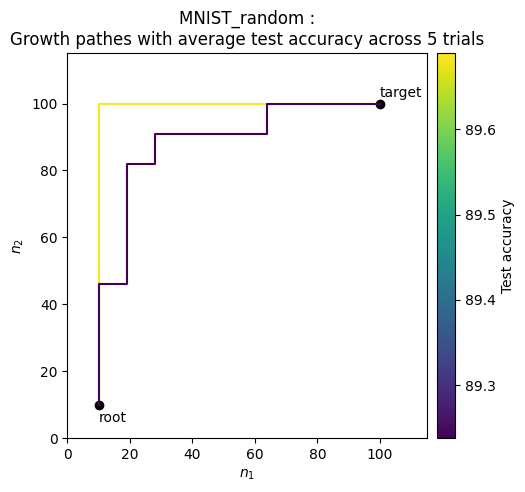

In [17]:
visualize_pathes(num_hidden, num_hidden_target, growth_schedules, test_accs, savefig)

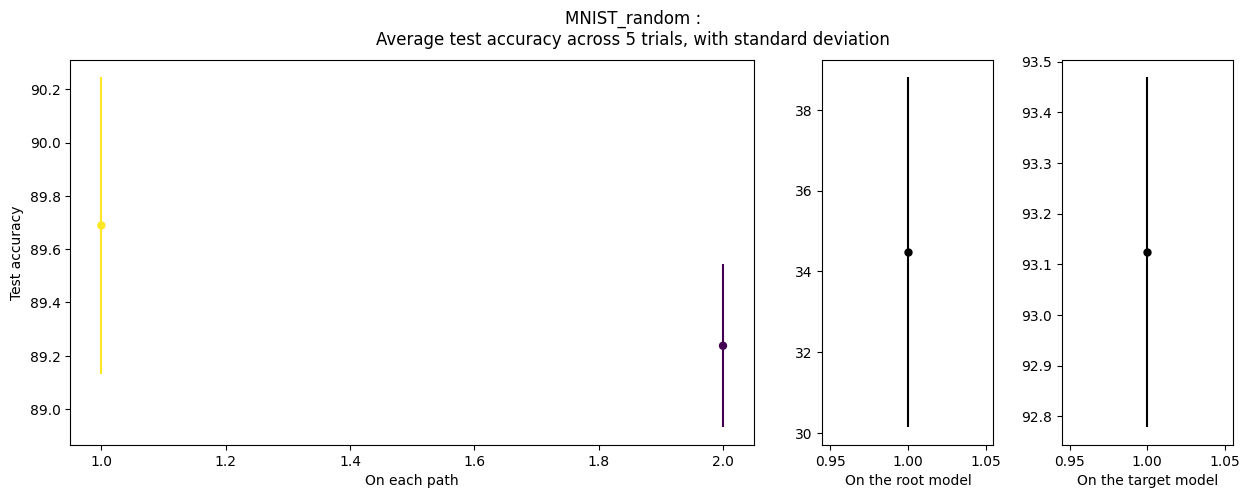

In [18]:
visualize_statistical_reliability (test_accs_repeted, test_accs, test_acc_roots, test_acc_targets,
                                   free_lim=True, savefig=savefig)

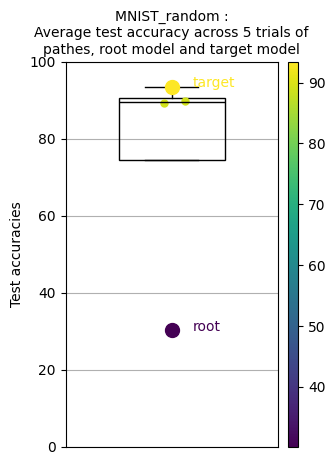

In [19]:
visualize_box_plot(test_accs, test_acc_root, test_acc_target, savefig)

## GradMax Initialization

### Define, train and test both root & target models

In [20]:
# Network's initial architecture
num_inputs = 28*28
num_hidden = 10
num_outputs = 10

# Network's final architecture
num_hidden_target = 100

# Loss & optimizer
loss_name = "MSE" # "CE"
optimizer_name = "Adam"

# Hyperparameters
num_epochs = 3
lr = 5e-3
growth_schedule = None

# Experiment parameters
num_repetitions = 2

#### Root model

In [21]:
test_acc_roots = []
for i in range(num_repetitions) :
    root_model = ANN(num_inputs, num_hidden, num_outputs).to(device)
    _ = train(root_model, num_outputs, growth_schedule, loss_name, optimizer_name, lr, train_loader, val_loader, num_epochs, batch_size, device, verbose=0)
    test_acc_root = test(root_model, test_loader, batch_size, device)
    test_acc_roots.append(test_acc_root)

100%|██████████| 3/3 [00:11<00:00,  3.70s/it]


In [22]:
test_acc_roots

[30.358717948717942, 74.89038461538462]

#### Target model

In [23]:
test_acc_targets = []
for i in range(num_repetitions) :
    target_model = ANN(num_inputs, num_hidden_target, num_outputs).to(device)
    _ = train(target_model, num_outputs, growth_schedule, loss_name, optimizer_name, lr, train_loader, val_loader, num_epochs, batch_size, device, verbose=0)
    test_acc_target = test(target_model, test_loader, batch_size, device)
    test_acc_targets.append(test_acc_target)

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
test_acc_targets

[94.12089743589746, 93.73038461538457]

### Grow root model

In [ ]:
# Growth parameters
init_name = "gradmax"
num_neurons = 9

In [ ]:
growth_schedules = get_handcrafted_schedule(num_neurons)[:2]

In [ ]:
test_accs_repeted = []
for i in range(num_repetitions) :
    test_accs = []
    for growth_schedule in growth_schedules :
        root_model = ANN(num_inputs, num_hidden, num_outputs).to(device)
        _ = train(root_model,
                  num_outputs,
                  growth_schedule,
                  loss_name, 
                  optimizer_name, lr, 
                  train_loader, val_loader, 
                  num_epochs, batch_size, 
                  device,
                  init_name=init_name,
                  verbose=0)
        test_acc = test(root_model, test_loader, batch_size, device)
        test_accs.append(test_acc)
    test_accs_repeted.append(test_accs)

100%|██████████| 3/3 [00:11<00:00,  3.83s/it]


In [ ]:
test_accs_repeted = np.array(test_accs_repeted)
test_accs = np.mean(test_accs_repeted, 0)

### Visualize results

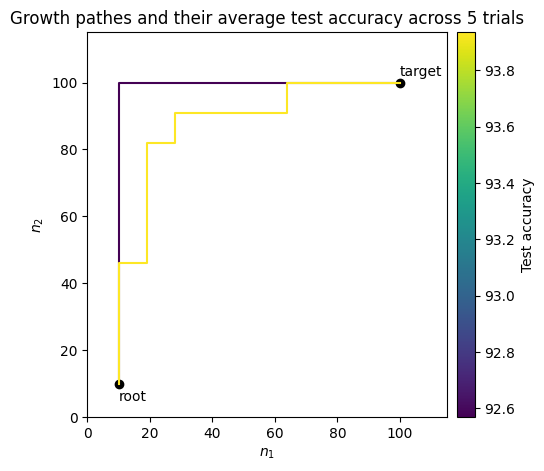

In [ ]:
visualize_pathes(num_hidden, num_hidden_target, growth_schedules, test_accs)

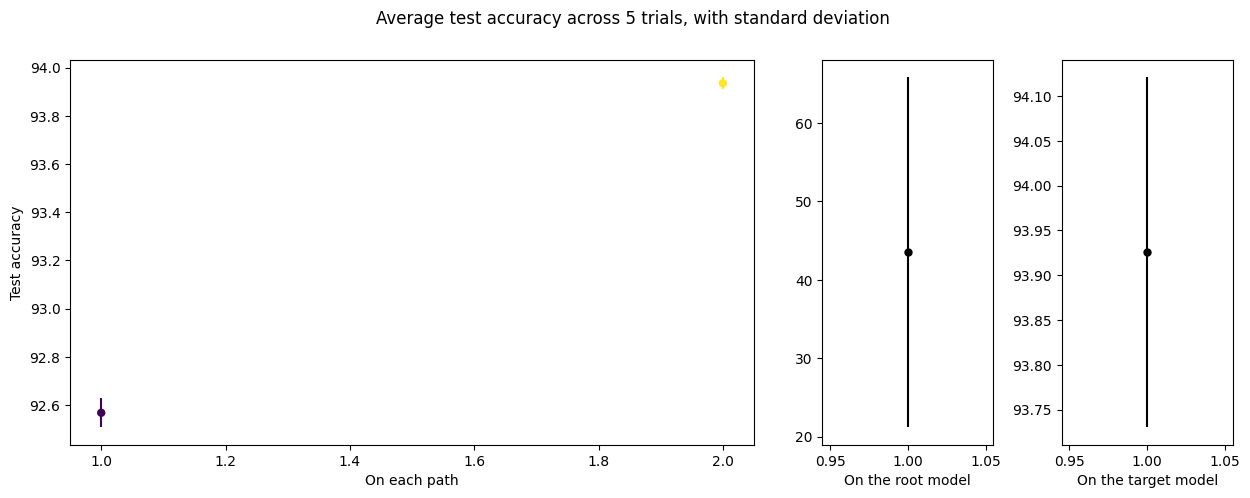

In [ ]:
visualize_statistical_reliability (test_accs_repeted, test_accs, test_acc_roots, test_acc_targets,
                                   free_lim=True)

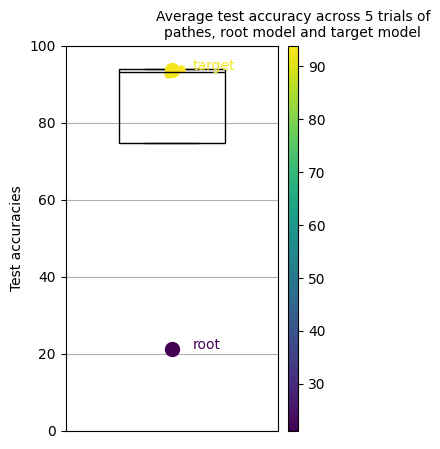

In [ ]:
visualize_box_plot(test_accs, test_acc_root, test_acc_target)